<a href="https://colab.research.google.com/github/xArcx/Final-Year-Project/blob/main/FacialExpressionRecognitionWithTransferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

# paths
train_dir = '/content/drive/MyDrive/Final Year Proj 21-22/Train/Binary'
val_dir = '/content/drive/MyDrive/Final Year Proj 21-22/Validation'
test_dir = '/content/drive/MyDrive/Final Year Proj 21-22/Test/Binary'
MODEL_DIR = '/content/drive/MyDrive/Final Year Proj 21-22/vit-mnist'

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, Concatenate
from tensorflow.keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator
from keras import callbacks
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()
#train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
#test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

def preprocess_images(imgs): # should work for both a single image and multiple images
    sample_img = imgs if len(imgs.shape) == 2 else imgs[0]
    assert sample_img.shape in [(28, 28, 1), (28, 28)], sample_img.shape # make sure images are 28x28 and single-channel (grayscale)
    return imgs / 255.0



In [ ]:
NUM_EPOCHS = 50
BATCH_SIZE = 64
LEARN_RATE = 0.00001
TEST_RATIO = 0.2
SEED = 60
NUM_CLASSES = 2
IMAGE_SIZE=224



# augment images using image data generator
data_aug = ImageDataGenerator(rescale=1.0/255.0,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest',
                         shear_range=0.15)

In [ ]:
model = keras.Sequential()

model.add(Conv2D(32, kernel_size=(4, 4), activation='relu', input_shape=(224, 224, 1))) 
model.add(Conv2D(32, kernel_size=(4, 4), activation='relu'))
model.add(Conv2D(64, (4, 4), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (4, 4), activation='relu'))
model.add(Conv2D(64, (4, 4), activation='relu'))
model.add(Conv2D(128, (4, 4), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 221, 221, 32)      544       
                                                                 
 conv2d_9 (Conv2D)           (None, 218, 218, 32)      16416     
                                                                 
 conv2d_10 (Conv2D)          (None, 215, 215, 64)      32832     
                                                                 
 batch_normalization_4 (Batc  (None, 215, 215, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 107, 107, 64)     0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 107, 107, 64)     

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(), 
              loss='binary_crossentropy',
              metrics=['accuracy'])




filepath = "modelCNN25thDec.h5"
#checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, 
#                            save_best_only=True, mode='max')

#reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=2, 
#                                   verbose=1, mode='max', min_lr=0.00001)
                              
                              
#callbacks_list = [checkpoint, reduce_lr]


history_main = model.fit(
                    data_aug.flow_from_directory(test_dir,target_size=(224,224), batch_size=BATCH_SIZE, shuffle=True,
                         color_mode='grayscale'),
                    epochs = 20, 
                    validation_data=data_aug.flow_from_directory(val_dir,target_size=(224,224), batch_size=BATCH_SIZE, shuffle=True,
                         color_mode='grayscale')#,callbacks=callbacks_list
                    )


Found 7067 images belonging to 2 classes.
Found 246 images belonging to 2 classes.
Epoch 1/20
111/111 [==============================] - 44s 352ms/step - loss: 3.1400 - accuracy: 0.5197 - val_loss: 0.6985 - val_accuracy: 0.4472
Epoch 2/20
111/111 [==============================] - 36s 321ms/step - loss: 0.7055 - accuracy: 0.5473 - val_loss: 0.7078 - val_accuracy: 0.4756
Epoch 3/20
111/111 [==============================] - 36s 320ms/step - loss: 0.6933 - accuracy: 0.5418 - val_loss: 0.7061 - val_accuracy: 0.4472
Epoch 4/20
111/111 [==============================] - 36s 324ms/step - loss: 0.6920 - accuracy: 0.5434 - val_loss: 0.6987 - val_accuracy: 0.4472
Epoch 5/20
111/111 [==============================] - 36s 322ms/step - loss: 0.6877 - accuracy: 0.5444 - val_loss: 0.6982 - val_accuracy: 0.4472
Epoch 6/20
111/111 [==============================] - 36s 325ms/step - loss: 0.6879 - accuracy: 0.5431 - val_loss: 0.7042 - val_accuracy: 0.4472
Epoch 7/20
111/111 [===========================

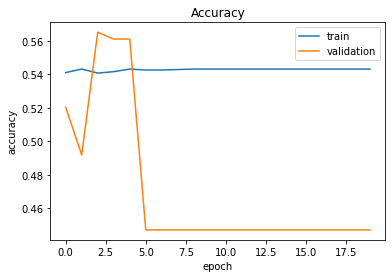

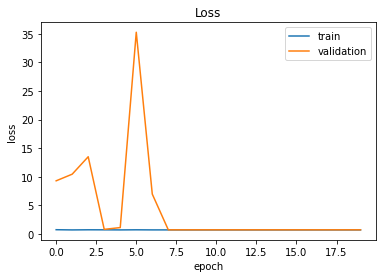

In [ ]:
# plot loss and accuracy history
plt.figure()
plt.plot(history_main.history['accuracy'])
plt.plot(history_main.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.savefig(MODEL_DIR + '/model_accuracy2.png')
plt.figure()
plt.plot(history_main.history['loss'])
plt.plot(history_main.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
#plt.savefig(MODEL_DIR + '/model_loss2.png')

plt.show()

resnet

In [ ]:
from tensorflow.keras.applications import ResNet50

input_ = tf.keras.Input(shape=(224, 224, 1))


img_conc=tf.keras.layers.Concatenate()([input_,input_,input_])


# Initialize the Pretrained Model
feature_extractor = ResNet50(weights='imagenet', 
                             input_tensor=img_conc,
                             include_top=False)

# Set this parameter to make sure it's not being trained
feature_extractor.trainable = False

# Set the input layer



x = Conv2D(32,(3,3),activation='relu' ,padding='same')(input_)
x = feature_extractor(input_, training=False)
# Set the feature extractor layer


# Set the pooling layer
x = tf.keras.layers.GlobalAveragePooling2D()(x)

# Set the final layer with sigmoid activation function
output_ = tf.keras.layers.Dense(2, activation='sigmoid')(x)

# Create the new model object
model = tf.keras.Model(input_, output_)

# Compile it
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

# Print The Summary of The Model
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 224, 224, 1)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_2   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 2)                 4098      
                                                                 
Total params: 23,591,810
Trainable params: 4,098
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.optimizers.Adam(), 
              loss='binary_crossentropy',
              metrics=['accuracy'])




filepath = "modelCNN25thDec.h5"
#checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, 
#                            save_best_only=True, mode='max')

#reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=2, 
#                                   verbose=1, mode='max', min_lr=0.00001)
                              
                              
#callbacks_list = [checkpoint, reduce_lr]


history_main_tf = model.fit(
                    data_aug.flow_from_directory(test_dir,target_size=(224,224), batch_size=BATCH_SIZE, shuffle=True,
                         color_mode='grayscale'),
                    epochs = 20, 
                    validation_data=data_aug.flow_from_directory(val_dir,target_size=(224,224), batch_size=BATCH_SIZE, shuffle=True,
                         color_mode='grayscale')#,callbacks=callbacks_list
                    )


Found 7067 images belonging to 2 classes.
Found 246 images belonging to 2 classes.
Epoch 1/20
111/111 [==============================] - 1048s 9s/step - loss: 0.6928 - accuracy: 0.5330 - val_loss: 0.6953 - val_accuracy: 0.4797
Epoch 2/20
111/111 [==============================] - 33s 298ms/step - loss: 0.6897 - accuracy: 0.5407 - val_loss: 0.6980 - val_accuracy: 0.4553
Epoch 3/20
111/111 [==============================] - 33s 298ms/step - loss: 0.6901 - accuracy: 0.5410 - val_loss: 0.7202 - val_accuracy: 0.4390
Epoch 4/20
111/111 [==============================] - 33s 297ms/step - loss: 0.6905 - accuracy: 0.5356 - val_loss: 0.7099 - val_accuracy: 0.4390
Epoch 5/20
111/111 [==============================] - 33s 296ms/step - loss: 0.6905 - accuracy: 0.5397 - val_loss: 0.6903 - val_accuracy: 0.5650
Epoch 6/20
111/111 [==============================] - 33s 298ms/step - loss: 0.6908 - accuracy: 0.5299 - val_loss: 0.6946 - val_accuracy: 0.4919
Epoch 7/20
111/111 [============================